In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import numpy as np
import matplotlib.pyplot as plt

In [2]:
heads, tails = 140, 110

In [3]:
sample_size = heads + tails

250

In [4]:
observed_proportion = heads / sample_size

0.56

In [5]:
flips = np.random.random(10) < observed_proportion

array([False, False,  True, False,  True, False, False,  True, False,
       False])

In [6]:
np.sum(flips)

3

In [7]:
def flip(n, p):
    return np.sum(np.random.random(n) < p)

In [8]:
flip(sample_size, observed_proportion)

134

In [9]:
def run_experiments(n, p, iters):
    t = [flip(n, p) for i in range(iters)]
    return np.array(t)

In [10]:
sample = run_experiments(sample_size, observed_proportion, 1000);

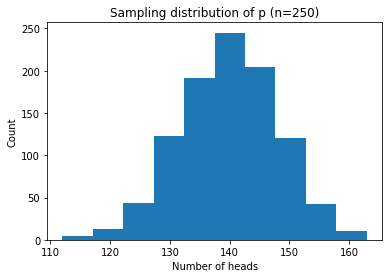

In [11]:
plt.hist(sample)
plt.title('Sampling distribution of p (n=250)')
plt.xlabel('Number of heads')
plt.ylabel('Count');

In [12]:
np.mean(sample)

139.853

In [13]:
std_err = np.std(sample)

7.995335577697787

In [14]:
ci_90 = np.percentile(sample, [5, 95])

array([126.95, 153.  ])

In [15]:
sample = run_experiments(sample_size, 0.5, 1000);

In [16]:
np.mean(sample >= heads)

0.029

In [17]:
import thinkstats2 as ts

In [18]:
import pandas as pd

In [19]:
df = pd.read_sas('LLCP2016.XPT')
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_MAM5021,_RFPAP33,_RFPSA21,_RFBLDS3,_COL10YR,_HFOB3YR,_FS5YR,_FOBTFS,_CRCREC,_AIDTST3
0,1.0,1.0,b'01072016',b'01',b'07',b'2016',1100.0,b'2016000001',2.016000e+09,1.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1.0,1.0,b'01112016',b'01',b'11',b'2016',1100.0,b'2016000002',2.016000e+09,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,2.0
2,1.0,1.0,b'01062016',b'01',b'06',b'2016',1100.0,b'2016000003',2.016000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1.0,1.0,b'01082016',b'01',b'08',b'2016',1100.0,b'2016000004',2.016000e+09,1.0,...,NaN,NaN,1.0,2.0,1.0,2.0,NaN,2.0,1.0,9.0
4,1.0,1.0,b'01052016',b'01',b'05',b'2016',1100.0,b'2016000005',2.016000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [20]:
columns = ['SEX', 'HTM4', 'WTKG3', '_LLCPWT']
selected = df[columns]
selected.to_hdf('LLCP2016.HDF', 'brfss')

In [21]:
df = pd.read_hdf('LLCP2016.HDF')
df.head()

,SEX,HTM4,WTKG3,_LLCPWT
0,1.0,173.0,6123.0,767.844566
1,2.0,160.0,6940.0,329.659884
2,2.0,165.0,5443.0,290.749306
3,1.0,185.0,9979.0,211.039206
4,1.0,168.0,5670.0,1582.539834


In [22]:
df['SEX'].describe()

count    486303.000000
mean          1.567874
std           0.502985
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: SEX, dtype: float64

In [23]:
df['HTM4'].describe()

count    469331.000000
mean        169.623291
std          10.580891
min          91.000000
25%         163.000000
50%         168.000000
75%         178.000000
max         234.000000
Name: HTM4, dtype: float64

In [24]:
df['WTKG3'].describe()

count    452773.000000
mean       8107.886435
std        2045.898917
min        2268.000000
25%        6668.000000
50%        7893.000000
75%        9072.000000
max       29257.000000
Name: WTKG3, dtype: float64

In [25]:
df['_LLCPWT'].describe()

count    486303.000000
mean        522.618894
std         960.497435
min           0.191186
25%          86.294955
50%         216.519496
75%         547.498391
max       37604.076933
Name: _LLCPWT, dtype: float64

In [26]:
males = df[df.SEX==1]
print('Mean male height in cm =', males.HTM4.mean())
print('Std male height in cm =', males.HTM4.std())

Mean male height in cm = 178.06121490985726
Std male height in cm = 7.7928971536184335


In [27]:
def sample_stat(data):
    return np.nanmean(data)

In [28]:
data = males.HTM4
xbar = sample_stat(data)

178.06121490985726

In [29]:
def resample(df):
    size = len(df)
    data = df.HTM4
    p = df._LLCPWT
    p /= np.sum(p)
    return np.random.choice(data, size=size, replace=True, p=p)

In [30]:
sample_stat(resample(males))

177.515778363075

In [31]:
sampling_dist_mean = [sample_stat(resample(df)) for i in range(1000)];

In [32]:
xbar_weighted = np.mean(sampling_dist_mean)

170.13627856543997

In [33]:
def show_sampling_dist(sampling_dist):
    plt.hist(sampling_dist)
    print('Mean = ', np.mean(sampling_dist))
    print('Std error = ', np.std(sampling_dist))
    print('90% CI = ', np.percentile(sampling_dist, [5, 95]))

Mean =  170.13627856543997
Std error =  0.01594257182292557
90% CI =  [170.11049723 170.16246505]


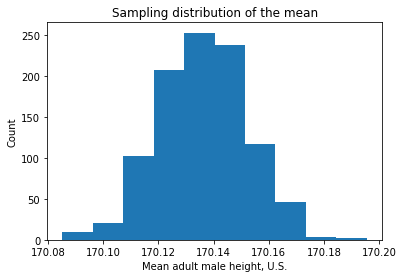

In [34]:
show_sampling_dist(sampling_dist_mean)
plt.title('Sampling distribution of the mean')
plt.xlabel('Mean adult male height, U.S.')
plt.ylabel('Count');

In [35]:
def analytic_stderr(df):
    males = df[df.SEX==1]
    size = len(males)
    a = males.HTM4
    return np.std(a) / np.sqrt(size)

In [36]:
analytic_stderr(df)

0.01698097071589304

In [37]:
def sample_stat(data):
    return np.nanstd(data) / np.nanmean(data) * 100

In [38]:
sampling_dist_cv = [sample_stat(resample(df)) for i in range(1000)];

Mean =  6.349645493705175
Std error =  0.006842939432531431
90% CI =  [6.33858613 6.3609145 ]


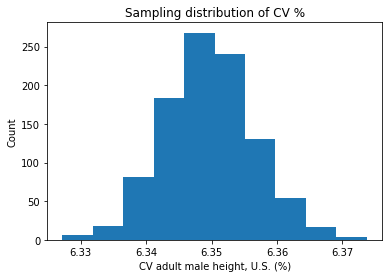

In [39]:
show_sampling_dist(sampling_dist_cv)
plt.title('Sampling distribution of CV %')
plt.xlabel('CV adult male height, U.S. (%)')
plt.ylabel('Count');

In [41]:
import nsfg

df = nsfg.ReadFemPreg()
df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [49]:
live = df[df.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

len(firsts), len(others)

(4413, 4735)

In [50]:
group1 = firsts.prglngth
group2 = others.prglngth

np.mean(group1), np.mean(group2)

(38.60095173351461, 38.52291446673706)

In [51]:
def test_stat(data):
    group1, group2 = data
    return group1.mean() - group2.mean()

In [55]:
data = group1, group2
actual = test_stat(data)

0.07803726677754952

In [56]:
def run_model(data):
    group1, group2 = data
    pool = np.hstack((group1, group2))
    np.random.shuffle(pool)
    n = len(group1)
    return np.split(pool, [n])

In [57]:
run_model(data)

[array([38, 39, 38, ..., 39, 41, 39]), array([39, 39, 40, ..., 40, 39, 43])]

In [58]:
test_stat(run_model(data))

-0.004268467623852246

In [59]:
test_stats = np.array([test_stat(run_model(data)) 
                       for i in range(1000)])
np.mean(test_stats)

0.00132963570481855

In [78]:
def plot_test_stats(test_stats, actual):
    plt.axvline(actual, linewidth=3, color='gray')
    plt.hist(test_stats, linewidth=3, histtype='step')
    plt.xlabel('Difference in means')
    plt.ylabel('Count')
    plt.title('Distribution of test stat under null')

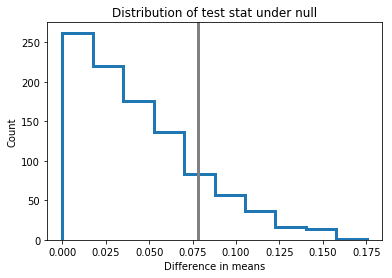

In [79]:
plot_test_stats(test_stats, actual)

In [63]:
def p_value(test_stats, actual):
    return np.mean(test_stats >= actual)

In [64]:
p_value(test_stats, actual)

0.095

In [65]:
def test_stat(data):
    group1, group2 = data
    return abs(group1.mean() - group2.mean())

0.164

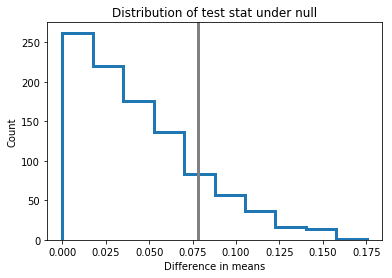

In [68]:
test_stats = np.array([test_stat(run_model(data)) 
                       for i in range(1000)])
plot_test_stats(test_stats, actual)
p_value(test_stats, actual)

In [80]:
class HypothesisTest(object):
    """Represents a hypothesis test."""

    def __init__(self, data):
        """Initializes.

        data: data in whatever form is relevant
        """
        self.data = data
        self.actual = self.test_stat(data)
        self.test_stats = np.array([self.test_stat(self.run_model())
                                    for i in range(1000)])

    def p_value(self):
        """Computes the p-value.

        returns: float p-value
        """
        return np.mean(self.test_stats >= self.actual)

    def plot_test_stats(self):
        """Draws a Cdf with vertical lines at the observed test stat.
        """
        plt.hist(self.test_stats, linewidth=3, histtype='step')
        plt.axvline(self.actual, linewidth=3, color='gray')
        plt.ylabel('Count')
        plt.title('Distribution of test stat under null')
        
    def test_stat(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        raise UnimplementedMethodException()

    def run_model(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        raise UnimplementedMethodException()

In [81]:
class DiffMeansPermute(HypothesisTest):
    """Tests a difference in means by permutation."""

    def test_stat(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        return abs(group1.mean() - group2.mean())

    def run_model(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        group1, group2 = self.data
        pool = np.hstack((group1, group2))
        np.random.shuffle(pool)
        n = len(group1)
        data = np.split(pool, [n])
        return data

Diff means permute pregnancy length
actual = 0.07803726677754952
p-value = 0.166


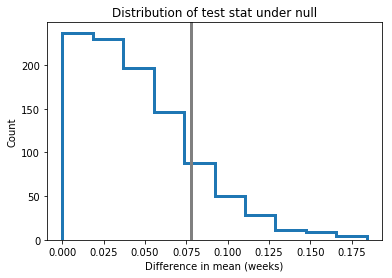

In [82]:
data = (firsts.prglngth, others.prglngth)
ht = DiffMeansPermute(data)
p_value = ht.p_value()

print('Diff means permute pregnancy length')
print('actual =', ht.actual)
print('p-value =', p_value)
ht.plot_test_stats()
plt.xlabel('Difference in mean (weeks)');

In [83]:
class DiffStdPermute(DiffMeansPermute):
    """Tests a difference in means by permutation."""

    def test_stat(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        return abs(group1.std() - group2.std())

Diff std permute pregnancy length
actual = 0.1760490642294399
p-value = 0.165


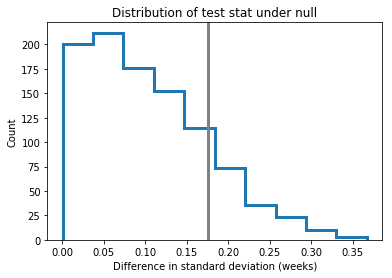

In [84]:
data = (firsts.prglngth, others.prglngth)
ht = DiffStdPermute(data)
p_value = ht.p_value()

print('Diff std permute pregnancy length')
print('actual =', ht.actual)
print('p-value =', p_value)
ht.plot_test_stats()
plt.xlabel('Difference in standard deviation (weeks)');